In [4]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
a = np.load('vae/15483481760431166//////////////////////validation/reconstruction_epoch_10_env_0.npy')

#a = np.load('/home/looka/workspace/phd/shallow_mind_lab/WorldModels/archives_before_NIPS/flatland_topview_wordmodels/vae/15480854362153199/////////validation/reconstruction_epoch_360.npy')

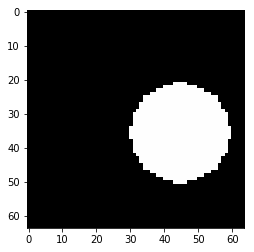

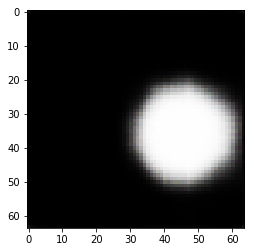

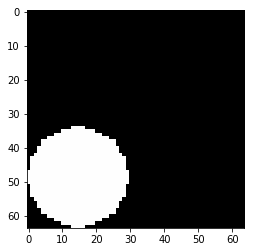

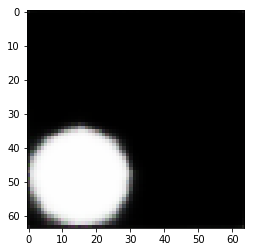

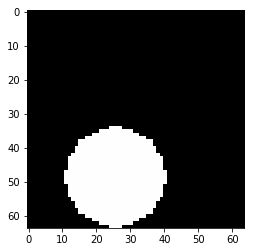

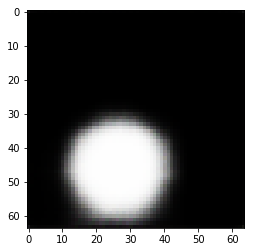

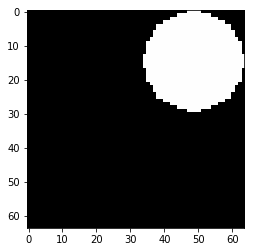

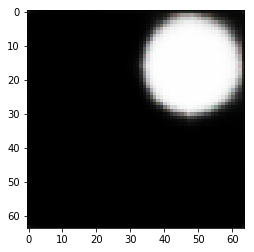

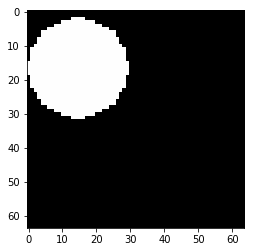

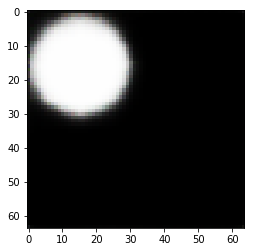

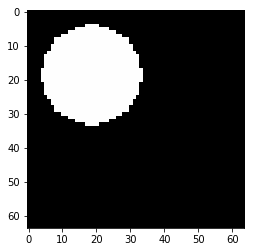

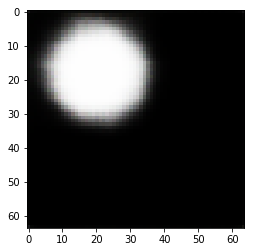

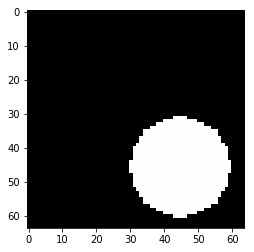

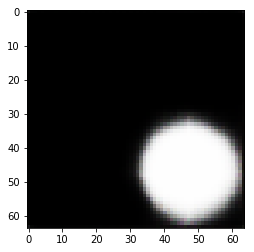

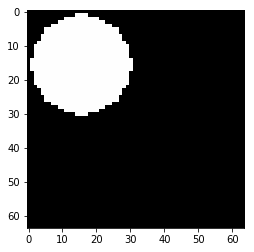

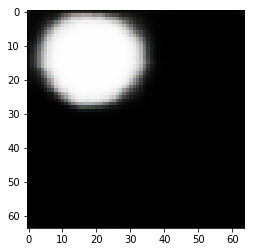

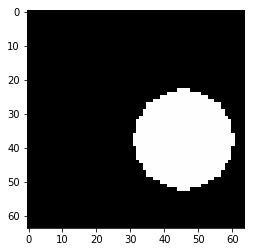

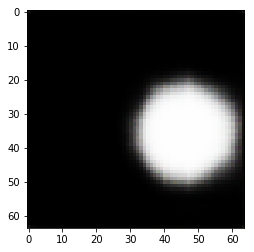

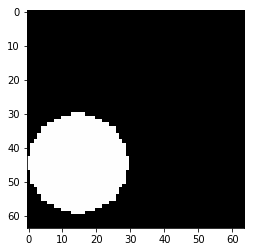

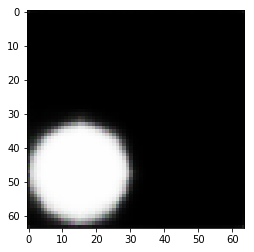

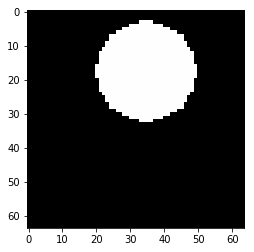

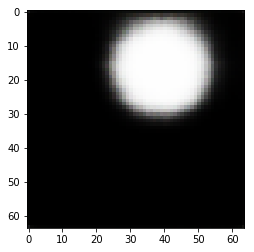

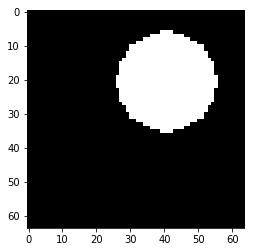

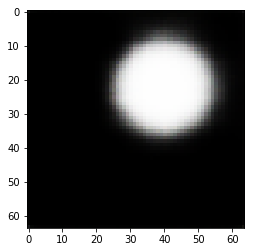

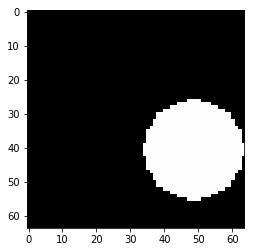

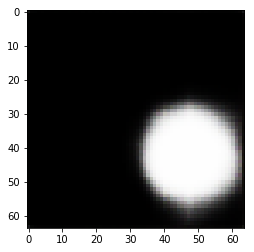

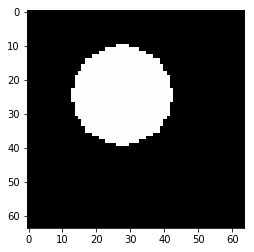

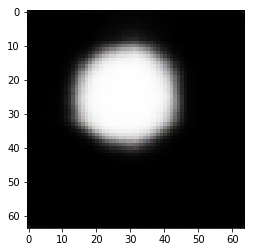

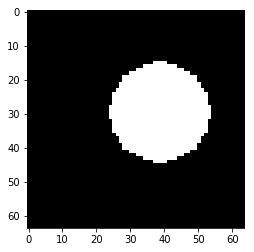

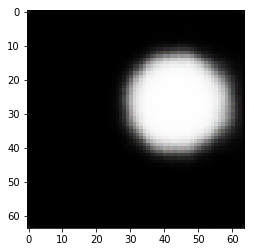

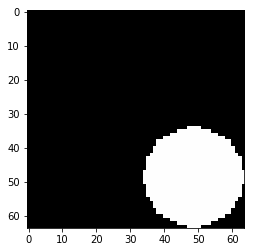

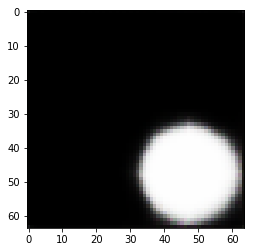

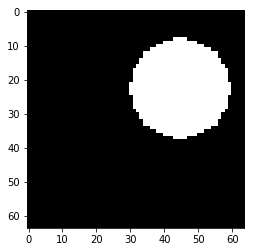

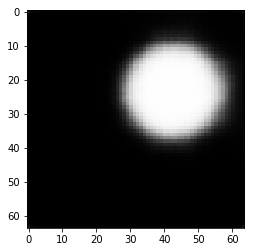

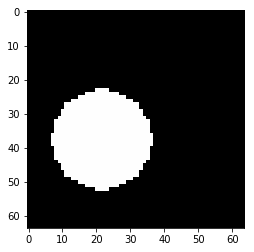

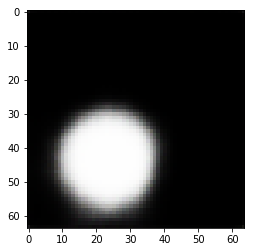

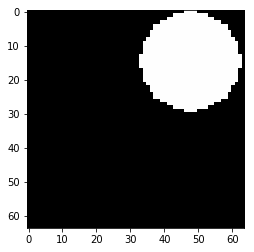

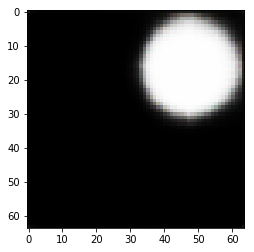

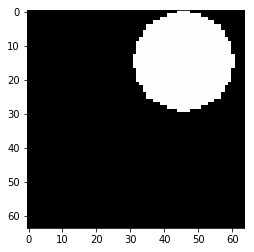

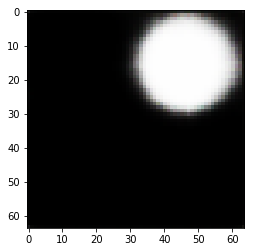

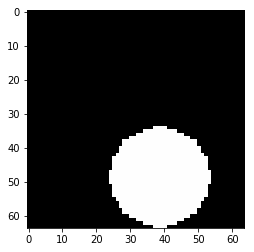

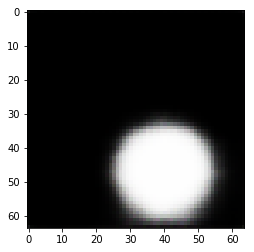

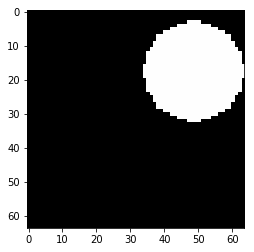

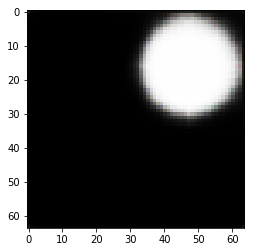

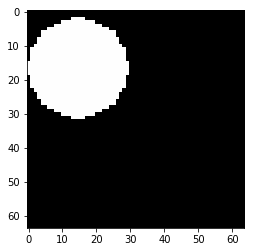

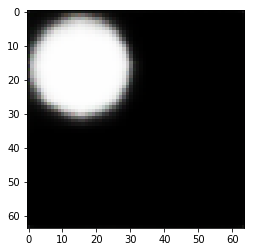

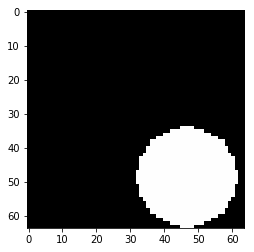

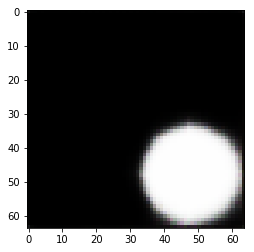

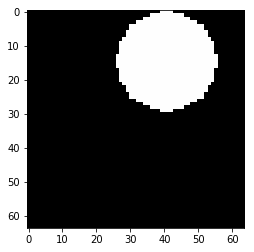

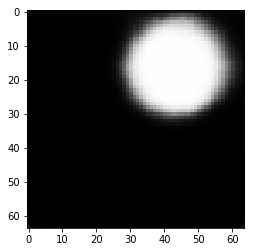

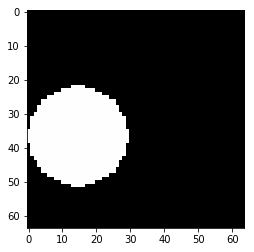

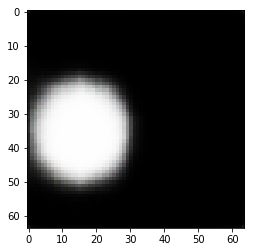

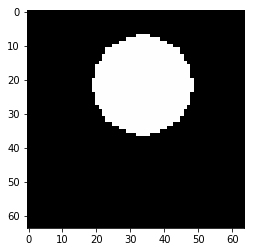

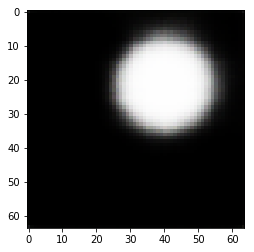

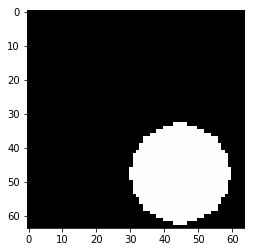

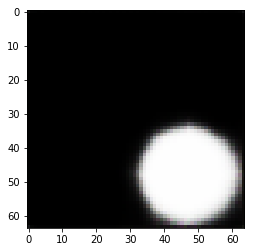

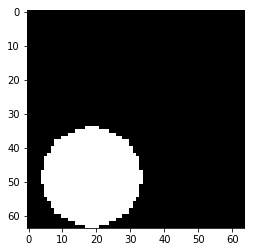

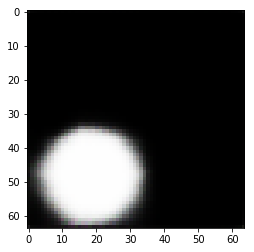

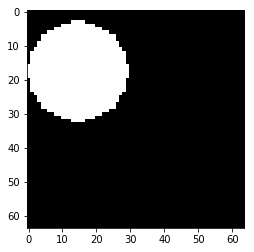

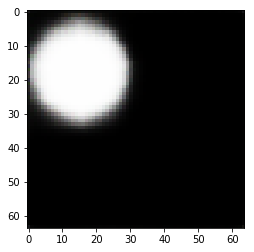

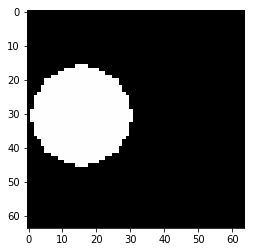

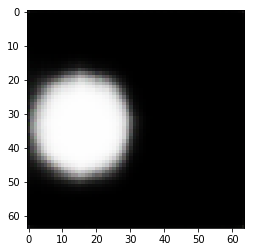

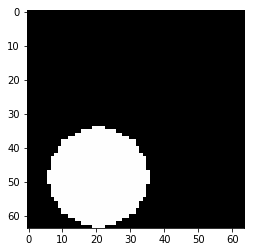

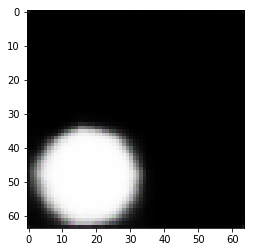

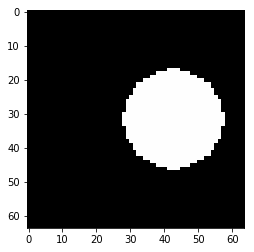

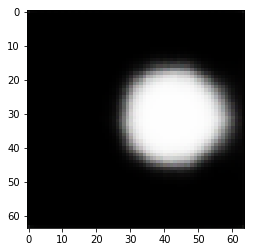

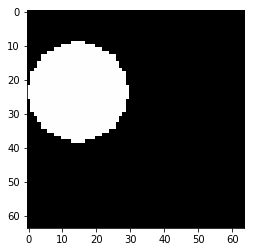

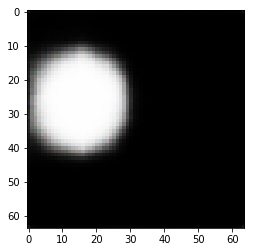

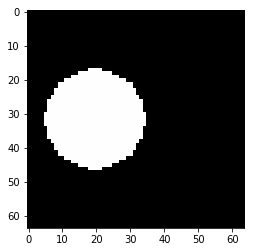

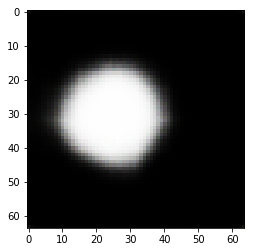

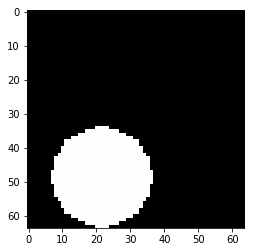

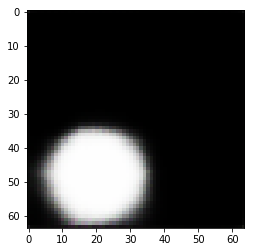

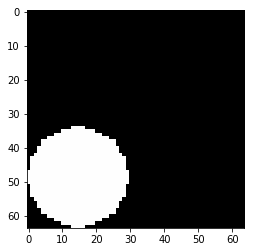

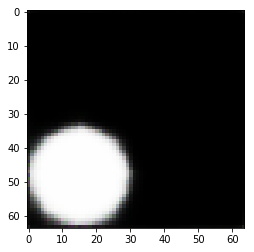

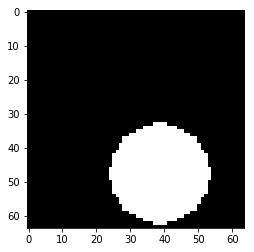

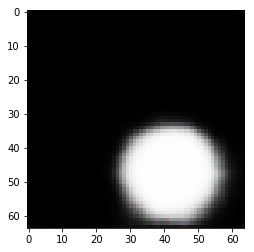

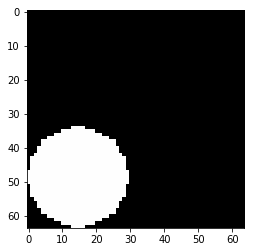

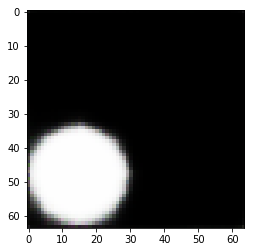

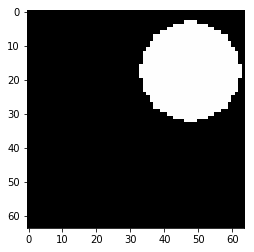

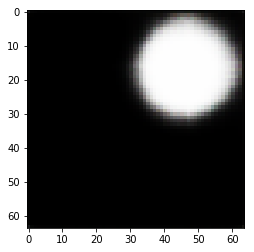

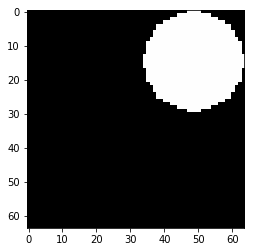

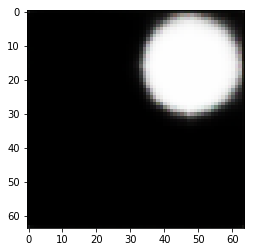

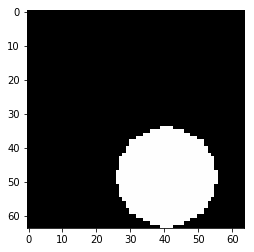

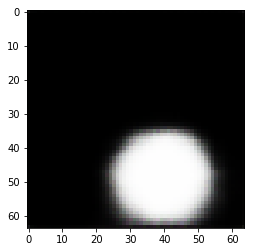

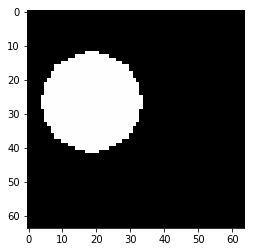

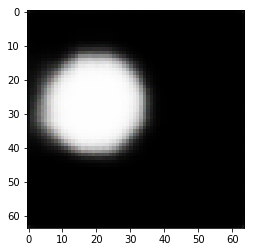

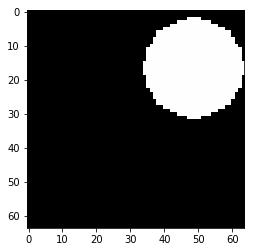

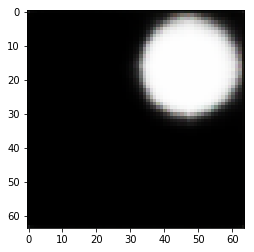

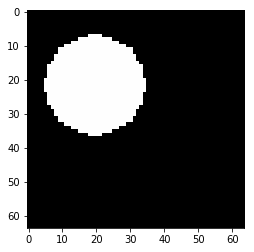

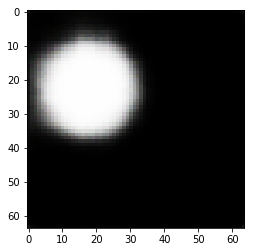

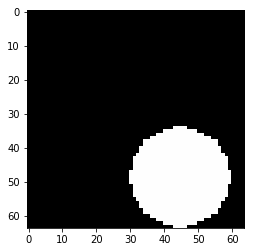

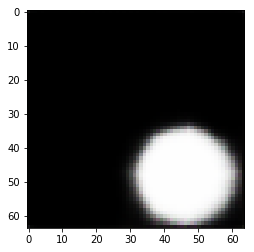

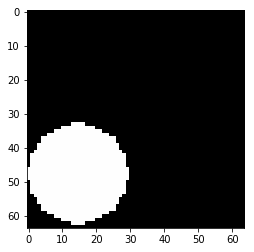

KeyboardInterrupt: 

In [58]:
for i in range(100):
    plt.imshow(a[0][i])
    plt.show()
    plt.imshow(a[1][i])
    plt.show()

In [64]:
import torch
from vae.arch_torch import VAE
vae = torch.load('../symmetry_based_disentanglement_a_la_WM/vae/15505876739898288///////////saved_models/epoch_10_env_0', map_location={'cuda:0': 'cpu'})

/home/looka/gym-gpu/lib/python3.5/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'vae.arch_torch.VAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [61]:
!pwd

/home/looka/workspace/phd/group/Symmetry_based_Disentanglement/reproduction_exp_CCI_VAE


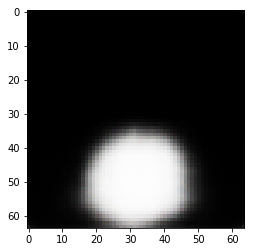

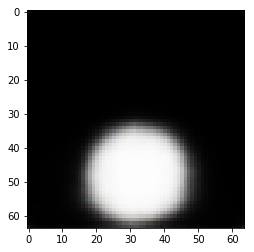

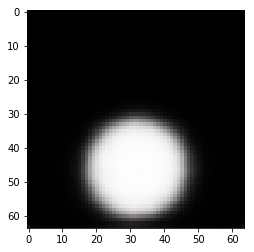

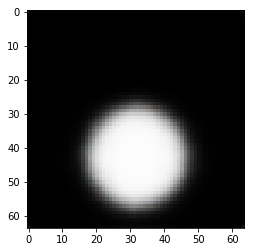

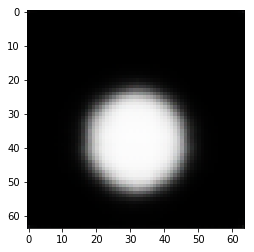

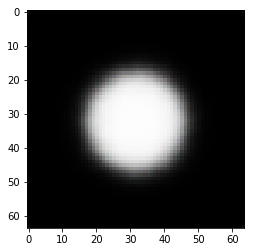

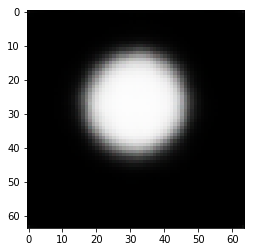

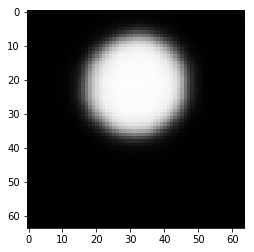

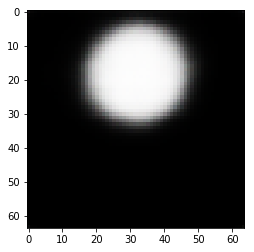

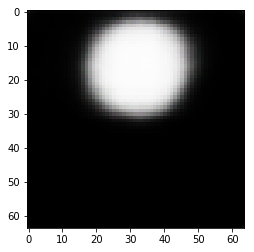

In [65]:
z = torch.tensor([0,-2]).float().view(1,2)
im_z_1 = []
for i in range(10):
    im = vae.forward(z, decode=True).detach().numpy().reshape(3,64,64).transpose((1,2,0))
    im_z_1.append(im)
    plt.imshow(im)
    #plt.savefig('vae/15483481760431166/disentanglement/z1_'+str(i)+'.png')
    plt.show()
    z=z+torch.tensor([0.,0.4]).float()
    


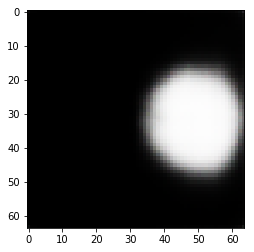

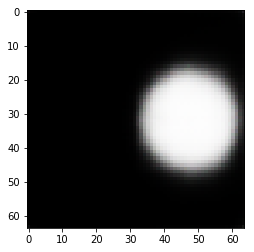

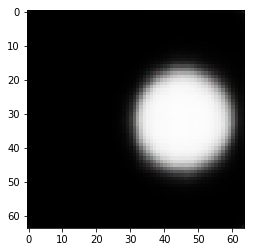

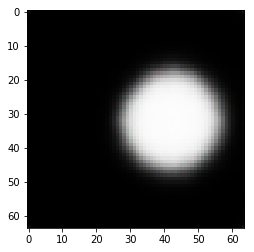

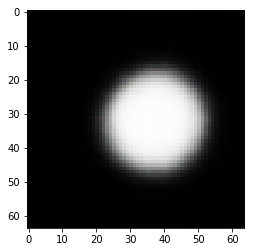

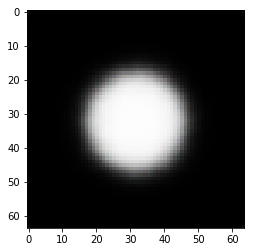

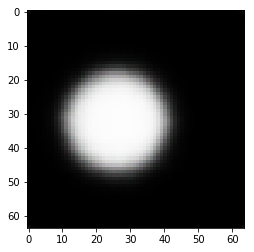

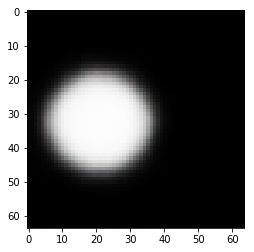

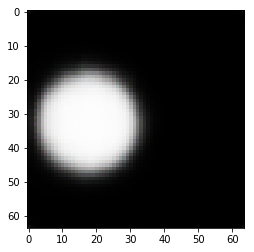

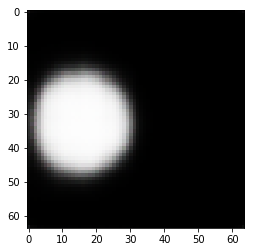

In [66]:
z = torch.tensor([-2,0]).float().view(1,2)
im_z_2 = []
for i in range(10):
    im = vae.forward(z, decode=True).detach().numpy().reshape(3,64,64).transpose((1,2,0))
    im_z_2.append(im)
    plt.imshow(im)
    #plt.savefig('vae/15483481760431166/disentanglement/z2_'+str(i)+'.png')
    plt.show()
    z=z+torch.tensor([0.4,0.]).float()
    

In [23]:
ims = []
ims.append(im_z_1)
ims.append(im_z_2)

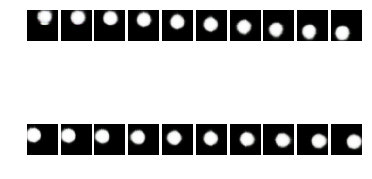

In [50]:
import matplotlib.gridspec as gridspec


fig, ax = plt.subplots(nrows=2, ncols=10)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for k,i in enumerate(ax):
    for j,axis in enumerate(i):
        axis.axis('off')
        axis.imshow(ims[k][j])
        

AttributeError: 'list' object has no attribute 'shape'

In [16]:
path_input = 'images/'
import os
lol=[]
from PIL import Image
for i,elem in enumerate(os.listdir(path_input)[:10]):
	lol.append(np.asarray(Image.open(path_input + elem).convert('RGB')))
lol = np.array(lol).reshape(-1,64,64,3)/255.


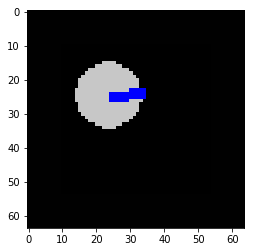

In [17]:
plt.imshow(lol[0])

In [18]:
im = vae.forward(torch.tensor(lol[0]).float(), encode=True).detach().numpy()

RuntimeError: expected stride to be a single integer value or a list of 1 values to match the convolution dimensions, but got stride=[2, 2]